In [501]:
import numpy
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [502]:
df = pd.read_csv('my_phone.csv')
df.head(10)

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0
5,5,1859,NO,164,22,1.0,1067,1,0,1004,1654,1.0
6,6,1821,NO,139,10,8.0,3220,0,1,381,1018,3.0
7,7,1954,NO,187,24,4.0,700,1,1,512,1149,0.0
8,8,1445,YES,174,53,7.0,1099,0,0,386,836,0.0
9,9,509,YES,93,9,5.0,513,1,0,1137,1224,0.0


In [503]:
df = df.drop(columns="Unnamed: 0")
#we already have index, no need to duplicate it

In [504]:
df.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [505]:
df.dtypes
#bluetooth - object ("yes", "no" values), dual_sim - object, even though they are already numerical

battery_power      int64
bluetooth         object
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim          object
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object

In [506]:
df['bluetooth'].unique()
#2 unique values "yes","no" > ordinal encoding

array(['NO', 'YES'], dtype=object)

In [507]:
bluetooth_replace = {"YES":1, "NO":0}
df["bluetooth"] = df["bluetooth"].replace(bluetooth_replace)

In [508]:
df['dual_sim'].unique()
#3 unique values, "NO" changing to 0 as they mean the same thing

array(['0', '1', 'NO'], dtype=object)

In [509]:
df['dual_sim'] = np.where(df['dual_sim'] == "NO", "0", df['dual_sim'])

In [510]:
#converting dual_sim to int64 type
df['dual_sim'] = df['dual_sim'].infer_objects().astype(np.int64)

In [511]:
df.dtypes

battery_power      int64
bluetooth          int64
weight             int64
memory             int64
n_cores          float64
ram                int64
dual_sim           int64
wifi               int64
pixel_height       int64
pixel_width        int64
price_range      float64
dtype: object

In [512]:
df['n_cores'].unique()
#it is strange that there are values with 3.5 cores 

array([2. , 3. , 5. , 6. , 1. , 8. , 4. , 7. , 3.5])

In [513]:
df[df['n_cores'] == 3.5]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
72,605,0,142,9,3.5,392,0,0,160,1026,0.0
76,1114,0,197,9,3.5,907,0,0,1040,1071,0.0
83,1008,0,114,61,3.5,2009,0,0,1077,1122,1.0
87,1083,1,178,64,3.5,3210,1,0,1025,1118,3.0
90,1724,0,177,57,3.5,2822,1,0,1605,1924,3.0
94,1322,0,140,7,3.5,1418,1,0,177,1990,1.0
95,1137,1,196,7,3.5,3616,0,1,942,1179,3.0
110,783,0,106,43,3.5,2016,1,0,1198,1471,1.0


There are several rows with 3.5 n_cores, while a phone should not have half of a core. 
Those rows will be dropped, can't round them up, or replace with a mean. 

In [514]:
df.drop(df.loc[df['n_cores']==3.5].index, inplace=True)

In [515]:
df[df['pixel_height'] == 0]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,0,99,40,4.0,3692,0,0,0,1987,3.0
1933,897,1,154,2,8.0,1958,0,0,0,994,1.0
2420,986,0,80,26,8.0,1316,0,0,0,1214,NaN
2819,1992,1,153,43,5.0,2179,1,0,0,883,NaN


Pixel_height can not be 0. Checked for similar values in pixel_width and substitute the 4 missing values with corresponding pixel_height or the mean of pixel_heights. 

In [516]:
#replaced with the another value that has the same pixel_width
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 1987), 1197, df['pixel_height'])

#replaced with the mean of same values in pixel_width
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 994), round((363+841+747)/3), df['pixel_height'])
df['pixel_height'] = np.where((df['pixel_height'] == 0) & (df['pixel_width'] == 883), round((856+620)/2), df['pixel_height'])

#dropped as no same values found in pixel_width
df.drop(df.loc[df['pixel_height']==0].index, inplace=True)

In [517]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,4011.000000,3012.000000
mean,1127.488158,0.374969,139.407878,27.353278,3.963849,1715.358514,0.507355,0.502867,673.196709,1115.845425,1.330677
std,426.027783,0.484175,33.658860,18.098073,2.221621,1184.587268,0.500008,0.500054,403.722944,459.785496,0.939315
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,1.000000,240.000000,0.000000
25%,780.000000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,366.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.000000,1.000000,1.000000,635.000000,1064.000000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2744.500000,1.000000,1.000000,950.500000,1492.500000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


After changing 0 values from pixel_height column the minimum became 1. For the SmartPhone Lowest Resolution is (240 x 320) and pixel_width min is 240 in our df. 

In [518]:
df[df['pixel_height'] < 320]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,0,188,7,2.0,2549,0,1,20,756,1.0
10,769,1,182,9,5.0,3946,1,0,248,874,3.0
11,1520,1,177,33,8.0,3826,0,1,151,1005,3.0
24,503,0,111,8,3.0,2583,1,0,201,1245,1.0
25,961,1,114,57,8.0,2782,1,1,291,1434,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2990,1807,0,162,37,1.0,2741,0,1,246,932,NaN
2991,1797,1,174,42,3.0,3359,0,1,57,1169,NaN
2994,936,1,139,46,2.0,684,1,1,265,886,NaN
2998,1533,1,171,50,2.0,2509,1,0,38,832,NaN


We have almost 1/4 of our data with pixel_height < 320. Would double check with the source of data how they plan to produce such small phones? For now, will remove those data that are below 320

In [519]:
df.drop(df.loc[df['pixel_height']<320].index, inplace=True)

In [520]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,2447.000000
mean,1098.053266,0.338301,140.009195,25.875079,3.827838,1596.981294,0.502219,0.512682,811.901078,1127.473367,1.318349
std,419.418624,0.473206,33.294088,17.815711,2.176884,1179.133337,0.500074,0.499918,339.216830,467.825203,0.890810
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,320.000000,240.000000,0.000000
25%,775.000000,0.000000,111.250000,11.000000,2.000000,585.250000,0.000000,0.000000,529.000000,754.000000,1.000000
50%,874.500000,0.000000,140.000000,17.000000,4.000000,1263.500000,1.000000,1.000000,762.000000,1084.000000,1.000000
75%,1439.000000,1.000000,168.000000,41.000000,5.000000,2596.750000,1.000000,1.000000,1034.000000,1517.000000,2.000000
max,1998.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1997.000000,3.000000


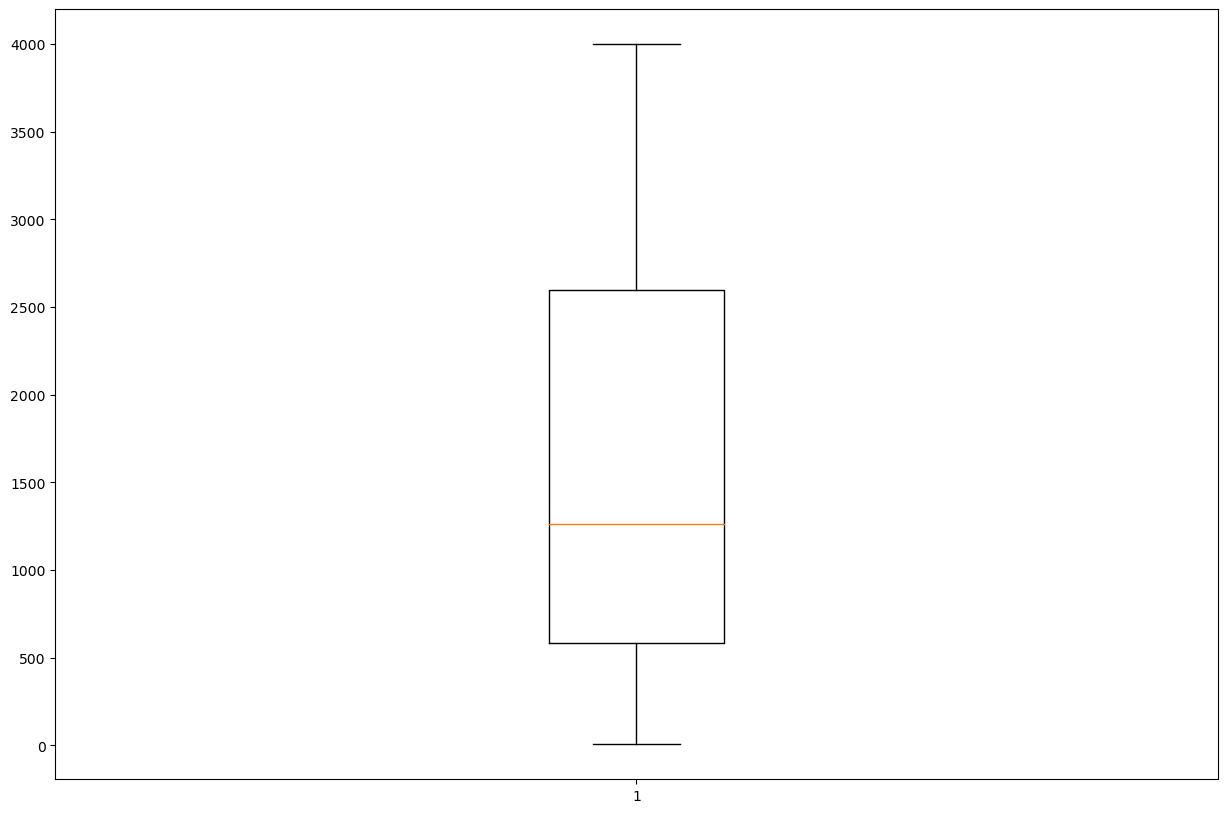

In [521]:
#checking distribution of data in 'ram' column because min is 6 and max is 3998
data = df['ram']
fig = plt.figure(figsize =(15, 10))
plt.boxplot(data)
plt.show()

In [522]:
df[df['ram'] > 2700].count()

battery_power    729
bluetooth        729
weight           729
memory           729
n_cores          729
ram              729
dual_sim         729
wifi             729
pixel_height     729
pixel_width      729
price_range      466
dtype: int64

In [523]:
df[df['ram'] < 700].count()

battery_power    984
bluetooth        984
weight           984
memory           984
n_cores          984
ram              984
dual_sim         984
wifi             984
pixel_height     984
pixel_width      984
price_range      896
dtype: int64

The distribution seems to be more or less balanced and gradual. There are quiet a lot of values below 25th and above 75th percentiles. 

In [524]:
df.isnull().values.any()

True

In [525]:
df['price_range'].isna().sum()

707

In count we have 2447 values in price_range and 3154 values in all other columns. All NaN seem to be in price_range 707+2447 = 3154, and those NaN are for the price_range we are supposed to predict. Remove those rows that are for predicting into separate phone_df.

In [526]:
phone_df = df.loc[2000:2999]

In [527]:
df.drop(df.loc[2000:2999].index, inplace=True)

In [528]:
df.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.00000,2447.000000,2447.000000,2447.000000,2447.000000
mean,1050.527176,0.291786,139.813241,23.533306,3.691868,1435.271761,0.49857,0.511647,808.212096,1071.266857,1.318349
std,403.358173,0.454677,32.780406,16.993374,2.124466,1155.936058,0.50010,0.499967,333.271339,466.715675,0.890810
min,501.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.00000,0.000000,320.000000,240.000000,0.000000
25%,772.000000,0.000000,112.000000,11.000000,2.000000,509.000000,0.00000,0.000000,528.500000,707.500000,1.000000
50%,828.000000,0.000000,140.000000,15.000000,3.000000,940.000000,0.00000,1.000000,766.000000,1019.000000,1.000000
75%,1347.000000,1.000000,167.000000,36.000000,5.000000,2339.000000,1.00000,1.000000,1028.000000,1431.500000,2.000000
max,1997.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.00000,1.000000,1960.000000,1997.000000,3.000000


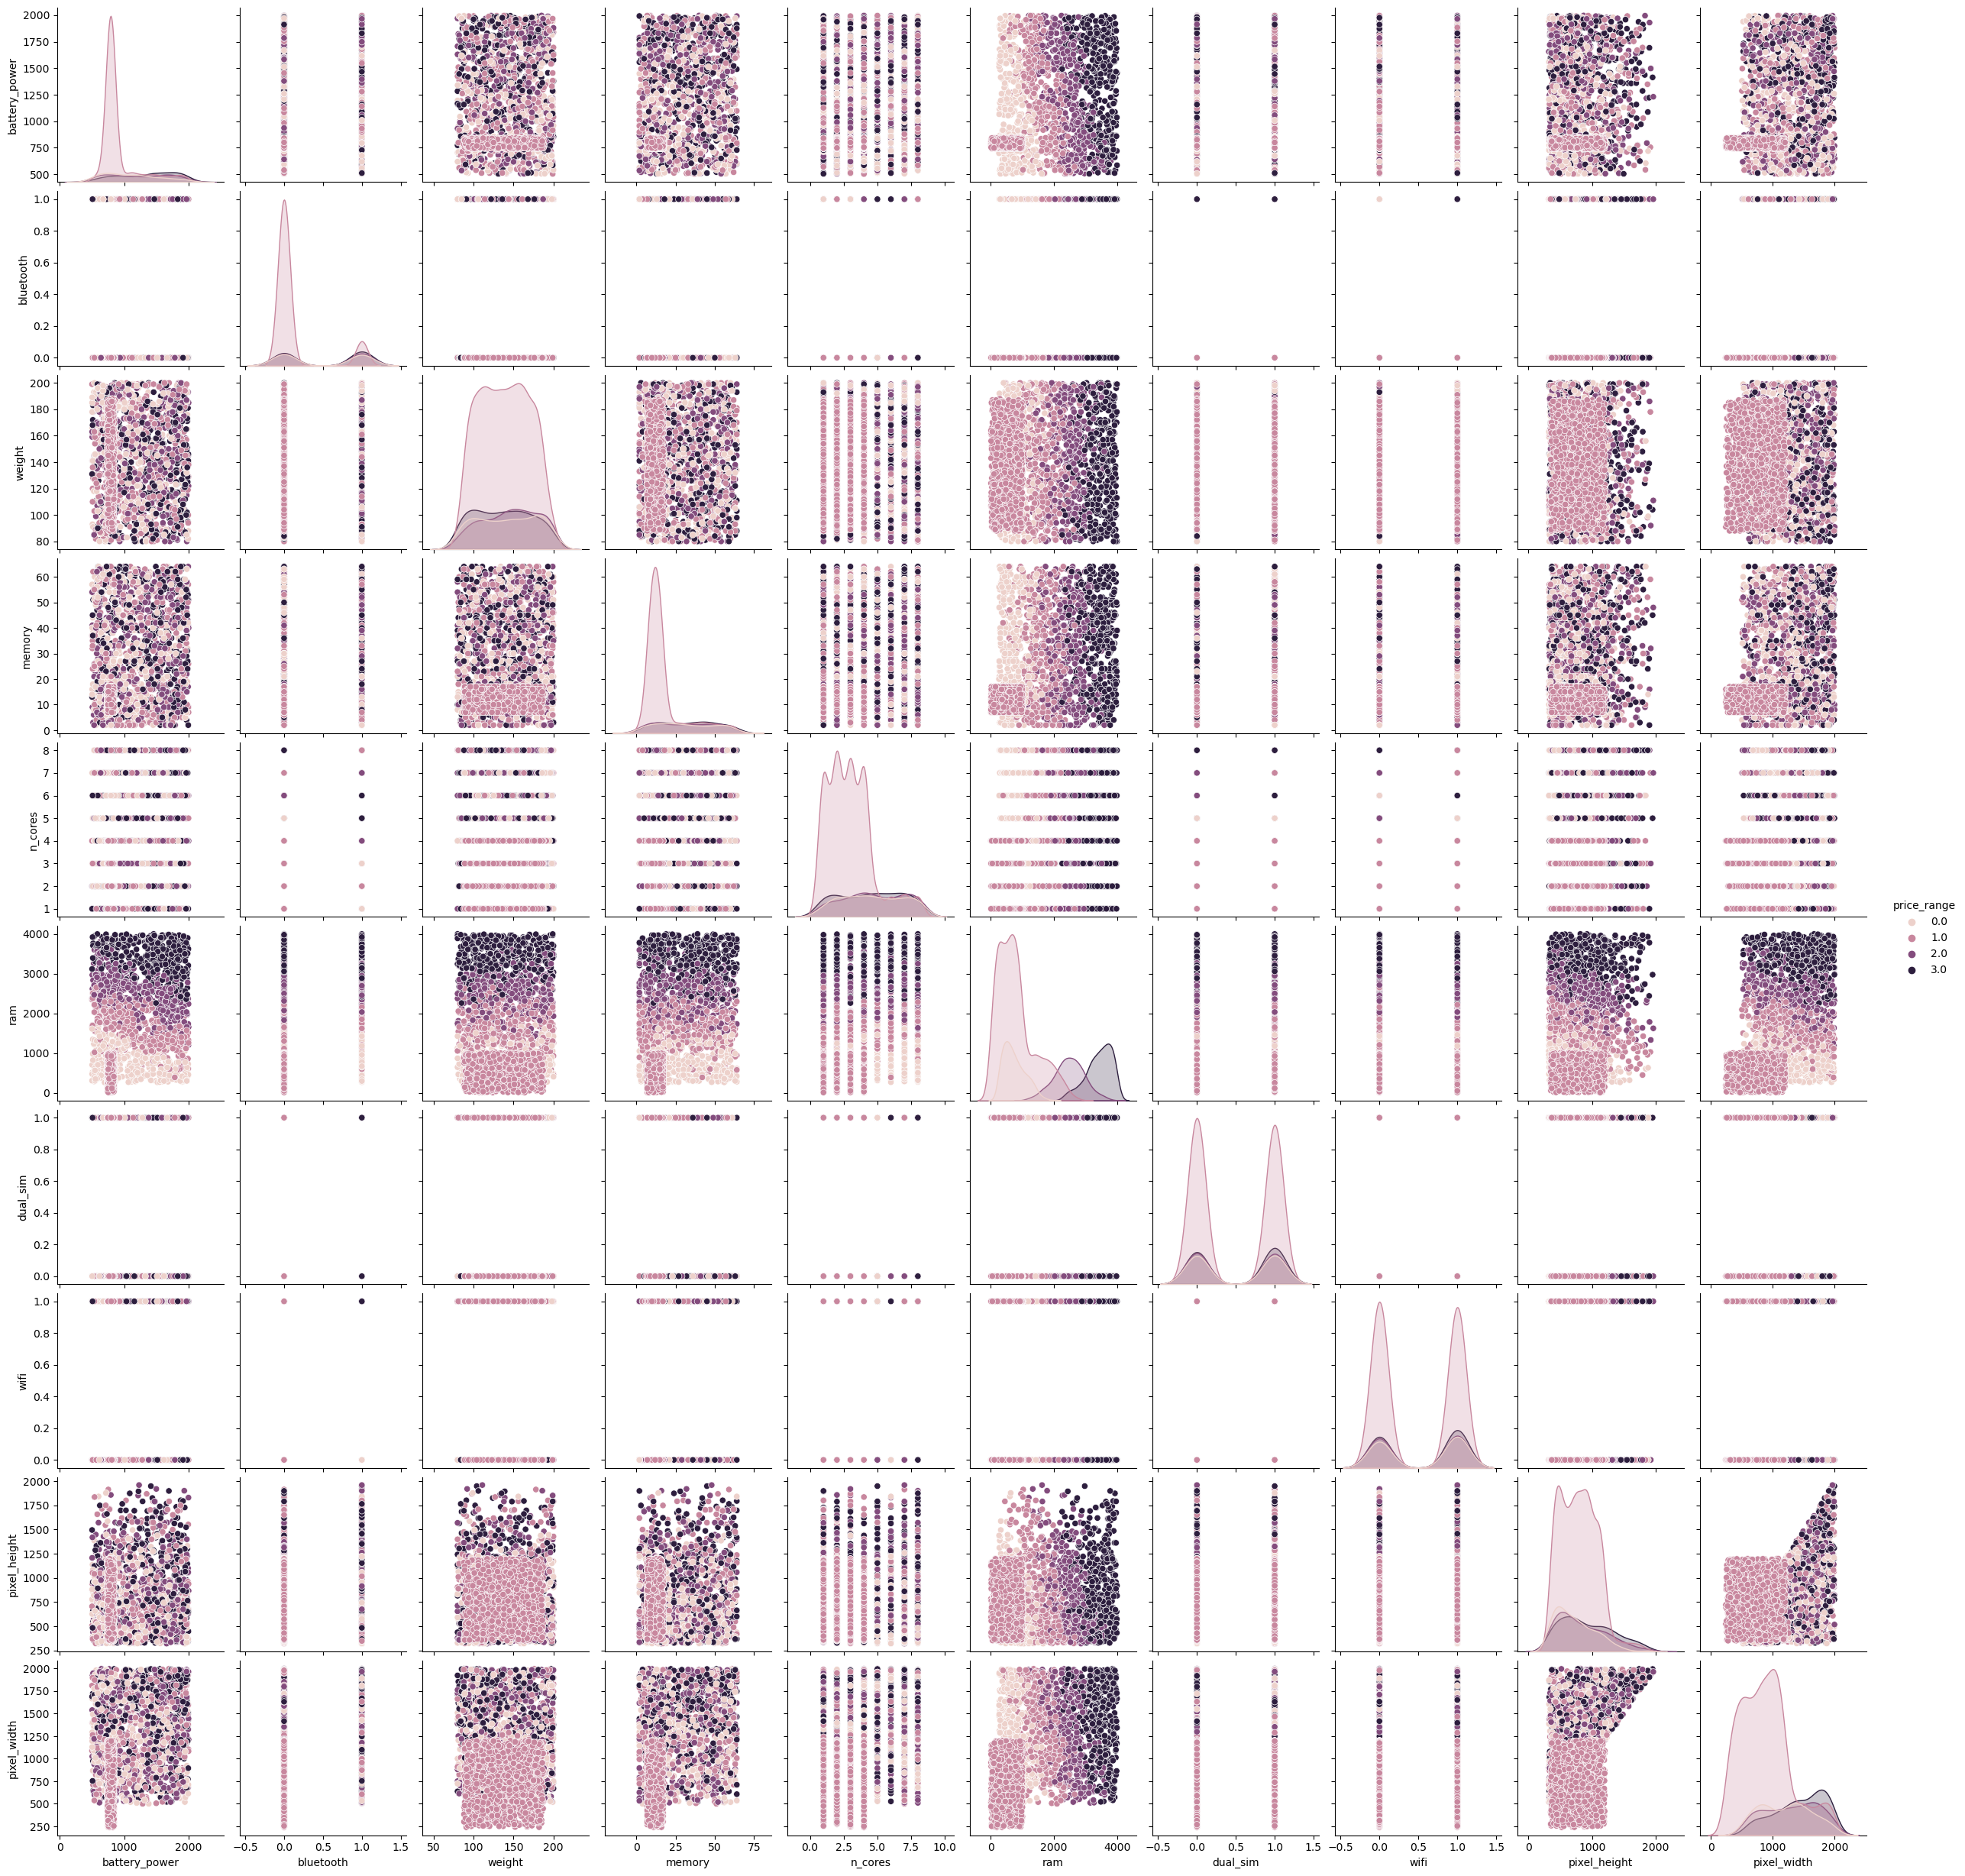

In [529]:
sns.pairplot(df, hue = 'price_range')

There is an artificial looking square of data in pairplot. 

In [530]:
df.groupby('price_range')['pixel_width'].nunique()
#price_range 1.0 has substantially more values than other types. 

price_range
0.0    302
1.0    869
2.0    304
3.0    341
Name: pixel_width, dtype: int64

In [531]:
df = df.loc[~((df['price_range']==1.0)  & (df['ram']<1100) & (df['pixel_width']<1200))]
#removed artificial data in price_range 1.0

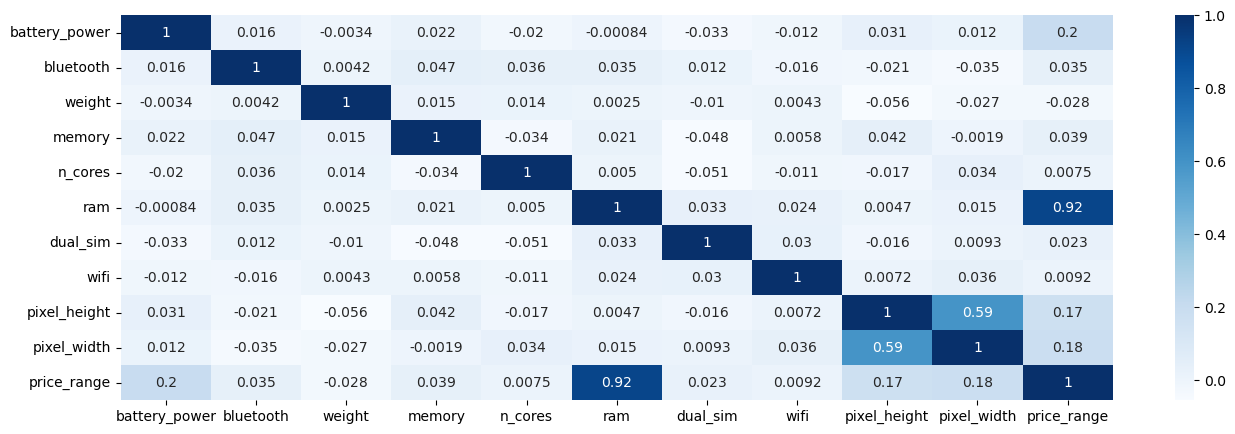

In [532]:
import seaborn as sns
cor_coef = df.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(cor_coef, annot=True, cmap = 'Blues')

In [533]:
df.corr()['price_range'].sort_values()

weight          -0.028353
n_cores          0.007488
wifi             0.009218
dual_sim         0.022747
bluetooth        0.035012
memory           0.038789
pixel_height     0.169246
pixel_width      0.180988
battery_power    0.197504
ram              0.916589
price_range      1.000000
Name: price_range, dtype: float64

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 1 to 3392
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1427 non-null   int64  
 1   bluetooth      1427 non-null   int64  
 2   weight         1427 non-null   int64  
 3   memory         1427 non-null   int64  
 4   n_cores        1427 non-null   float64
 5   ram            1427 non-null   int64  
 6   dual_sim       1427 non-null   int64  
 7   wifi           1427 non-null   int64  
 8   pixel_height   1427 non-null   int64  
 9   pixel_width    1427 non-null   int64  
 10  price_range    1427 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 133.8 KB


Logistic regression

In [535]:
X = df.drop(columns = ['price_range', 'pixel_height']) #too high correlation between pixel_width and pixel_height
Y = df['price_range']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [536]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=20,solver='lbfgs',multi_class='auto', max_iter=1500)
classifier.fit(x_train,y_train)

y_val_pred = classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred, normalize=True).round(4)
val_precision = precision_score(y_val, y_val_pred, average='macro').round(4)
print(f'Logistic Regression Validation Accuracy Score: {val_accuracy}')
print(f'Logistic Regression Validation Precision Score: {val_precision}\n')

Logistic Regression Validation Accuracy Score: 0.6783
Logistic Regression Validation Precision Score: 0.6717



In [537]:
X = df[['battery_power', 'ram', 'pixel_width']] #trying only those columns that have high corr with target
Y = df['price_range']

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [538]:
classifier=LogisticRegression(random_state=20,solver='lbfgs',multi_class='auto', max_iter=1500)
classifier.fit(x_train,y_train)

y_val_pred = classifier.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred, normalize=True).round(4)
val_precision = precision_score(y_val, y_val_pred, average='macro').round(4)
print(f'Logistic Regression Validation Accuracy Score: {val_accuracy}')
print(f'Logistic Regression Validation Precision Score: {val_precision}\n')

Logistic Regression Validation Accuracy Score: 0.9161
Logistic Regression Validation Precision Score: 0.9179



KNN

In [539]:
X = df.drop(columns = ['price_range'])
Y = df['price_range']

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [540]:
from sklearn import neighbors 
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [541]:
y_val_pred = KNN_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred, normalize=True).round(4)
val_precision = precision_score(y_val, y_val_pred, average='macro').round(4)
print(f'KNN Validation Accuracy Score: {val_accuracy}')
print(f'KNN Validation Precision Score: {val_precision}\n')

KNN Validation Accuracy Score: 0.9301
KNN Validation Precision Score: 0.929



In [542]:
sse = [] # sum of squared errors
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)
cluster_df = pd.DataFrame({'Cluster':range(1,25), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,1.914016e+09
1,2,9.343102e+08
2,3,7.382006e+08
3,4,6.545462e+08
4,5,5.849903e+08


Text(0, 0.5, 'Squared error')

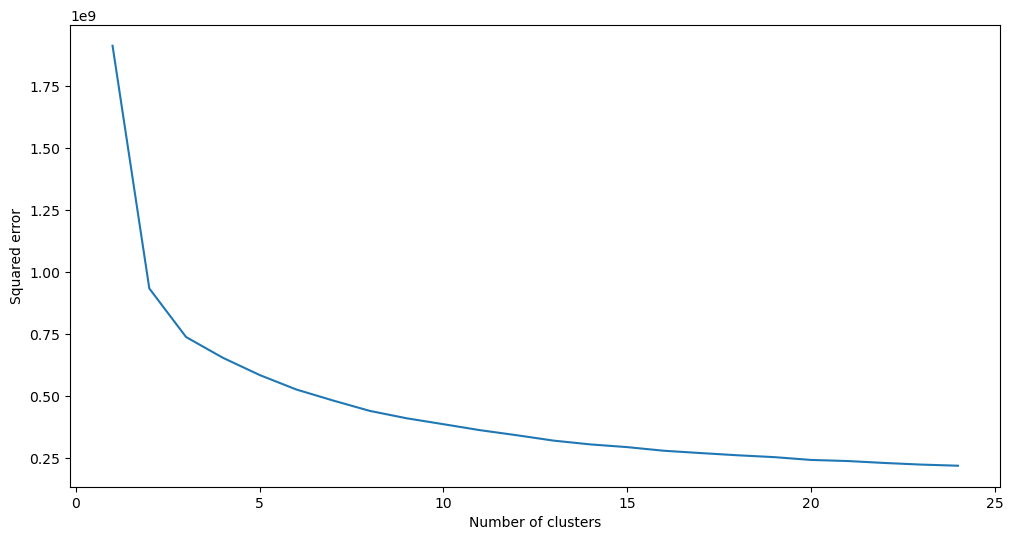

In [543]:
plt.figure(figsize=(12,6))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Squared error')

In [544]:
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=5) #k 5 seems to be optimal according to elbow method
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [545]:
y_val_pred = KNN_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred, normalize=True).round(4)
val_precision = precision_score(y_val, y_val_pred, average='macro').round(4)
print(f'KNN Validation Accuracy Score: {val_accuracy}')
print(f'KNN Validation Precision Score: {val_precision}\n')

KNN Validation Accuracy Score: 0.9371
KNN Validation Precision Score: 0.936



Applying to phone_df KNN ML

In [546]:
our_pred = phone_df.drop(columns = ['price_range'])
pred = KNN_model.predict(our_pred)

In [547]:
phone_df_copy['price_range_predicted'] = pred.tolist()

In [548]:
phone_df_copy

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range_predicted
2001,841,1,191,61,5.0,3895,1,0,746,857,3.0
2002,1807,1,186,27,3.0,2396,0,1,1270,1366,3.0
2004,1434,0,108,49,6.0,1773,0,1,749,810,1.0
2005,1464,1,198,50,8.0,3506,1,1,569,939,3.0
2006,1718,0,156,47,2.0,3873,0,0,1283,1374,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2993,567,1,165,56,8.0,336,1,1,555,1290,0.0
2995,1700,1,170,54,7.0,2121,0,0,644,913,2.0
2996,609,0,186,13,4.0,1933,1,1,1152,1632,1.0
2997,1185,0,80,8,1.0,1223,0,0,477,825,0.0
